# HW4_3 - Constrained Optimization and Sparse Kernel Machines

Learning contents:

* Constrained Optimization
    * Reformulate the problem as a maximization problem
    * Write out the Lagrangian function
    * Compute the gradients with respects to $x_1, x_2$, Lagrange multiplier $\lambda$ and the KKT multiplier $\mu$
    * Compute the optimum
* Support Vector Machine
    * Fit a linear SVM classifier, and plot the decision boundary, margin, and support vectors
    * Fit a non-linear SVM classifier using the RBF kernel, and plot the decision boundary, margin, and support vectors
    * Compare C=1 with C=1000 on the RBF-kernel SVM-classifier. What is the effect of a larger C? What could be the downside of a very large C?

In [1]:
# Dependencies
import numpy as np
import scipy
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(); sns.set_palette('bright')

from sklearn import svm

# 1) Constrained Optimization
 
Consider the problem

minimize $$f_{min}(x_1, x_2)$$

subject to $$ x_1 + x_2 \leq 4 
\quad \text{ and } \quad x_1 + 4x_2 = 5 
$$
where $$f_{min}(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 2)^2$$

## 1.1) Reformulate the problem as a canonical maximization problem
_Use the form described in the end of "Pattern Recognition and Machine Learning" Appendix E._

# 1) Maximization Problem

maximize 
$$f_{max}(y_1, y_2) = -[(y_1 - 3)^2 + (y_2 - 2)^2]$$

subject to 
$$-y_1 - y_2 \geq -4$$
$$y_1 + 4y_2 = 5$$


In [2]:
def f_max(x1, x2):
    # Function for the canonical maximization problem
    return -(x1 - 3)**2 - (x2 - 2)**2

## 1.2) Write out the Lagrangian function
_Use Equation (E.12) in "Pattern Recognition and Machine Learning" Appendix E., and write out all variables_

## The Lagrangian is defined as:

$$L(y_1, y_2, \alpha, \beta) = f_{max}(y_1, y_2) - \alpha(g(y_1, y_2) + 4) - \beta(h(y_1, y_2) - 5)$$

For our problem:

$$f_{max}(y_1, y_2) = -[(y_1 - 3)^2 + (y_2 - 2)^2]$$
$$g(y_1, y_2) = -y_1 - y_2$$
$$h(y_1, y_2) = y_1 + 4y_2$$

Substituting these into the Lagrangian equation gives:

$$L(y_1, y_2, \alpha, \beta) = -[(y_1 - 3)^2 + (y_2 - 2)^2] - \alpha(-y_1 - y_2 + 4) - \beta(y_1 + 4y_2 - 5)$$


In [3]:
def L(x1, x2, lambda_, mu):
    # The Lagrangian function
    return (x1 - 3)**2 + (x2 - 2)**2 + lambda_ * (4 - x1 - x2) + mu * (x1 + 4*x2 - 5)

## 1.3) Compute the gradients with respects to $x_1, x_2$, lagrange multiplier $\lambda$ and the KKT multiplier $\mu$

In [4]:
from sympy import symbols, diff

# Define the symbols
y1, y2, alpha, beta = symbols('y1 y2 alpha beta')

# Define the objective function
f_max = -((y1 - 3)**2 + (y2 - 2)**2)

# Define the inequality constraint
g = -y1 - y2 + 4

# Define the equality constraint
h = y1 + 4*y2 - 5

# Define the Lagrangian function
L = f_max - alpha * g - beta * h

# Compute the gradients
gradient_y1 = diff(L, y1)
gradient_y2 = diff(L, y2)
gradient_alpha = diff(L, alpha)
gradient_beta = diff(L, beta)

# Print the gradients
print("The gradient of L with respect to y1 is: ", gradient_y1)
print("The gradient of L with respect to y2 is: ", gradient_y2)
print("The gradient of L with respect to alpha is: ", gradient_alpha)
print("The gradient of L with respect to beta is: ", gradient_beta)

The gradient of L with respect to y1 is:  alpha - beta - 2*y1 + 6
The gradient of L with respect to y2 is:  alpha - 4*beta - 2*y2 + 4
The gradient of L with respect to alpha is:  y1 + y2 - 4
The gradient of L with respect to beta is:  -y1 - 4*y2 + 5


## 1.4) Compute the optimum
_Hint: Set it up as a system of linear equations and solve it using Gaussian Elimination (e.g. using `scipy.linalg.solve`)_

In [5]:
from sympy import solve

# Set the gradients to zero and solve
solutions = solve((gradient_y1, gradient_y2, gradient_alpha, gradient_beta), (y1, y2, alpha, beta))

print("The solutions are: ", solutions)


The solutions are:  {y1: 11/3, y2: 1/3, alpha: 26/9, beta: 14/9}


# 2) Support Vector Machines
As usual, we'll be working with a dataset of handwritten digits. 
Let visualise some examples.

In [6]:
# We're using a subset of two classes
digits = load_digits(n_class=2)

In [7]:
# We can get a 2D version of the data using PCA
pca = PCA(n_components=2)
t = 2* digits.target -1 # {-1,1}
X = pca.fit_transform(digits.data)

# In order to get a non-linearly seperable case, 
# we'll modify the data a bit this time, 
# translating the '-1' class to the right
X = np.where(
    np.repeat(np.expand_dims(t == 1, axis=1), 2, axis=1), 
    X, 
    np.vstack([X[:,0]+15, X[:,1]]).T
)

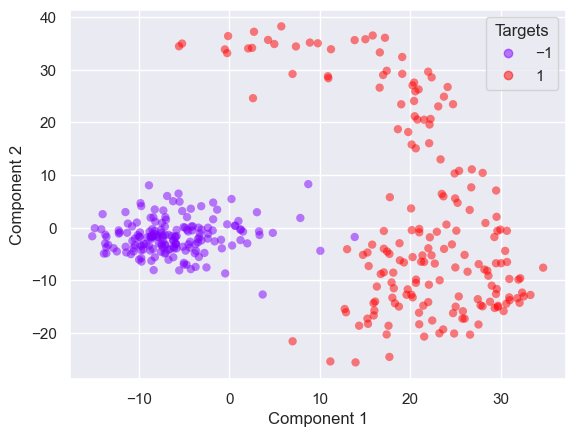

In [8]:
# Let's plot all the data in 2D
def plot_scatter(data, target, alpha=0.5, legend=True):
    scatter = plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=alpha, cmap='rainbow')
    if legend:
        plt.legend(*scatter.legend_elements(), loc="upper right", title="Targets")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
plot_scatter(X, t)

## 2.1) Fit a linear SVM classifier, and plot the decision boundary, margin, and support vectors
_Hint: use the SVM classifier from scikit-learn. The default C=1 will do just fine_

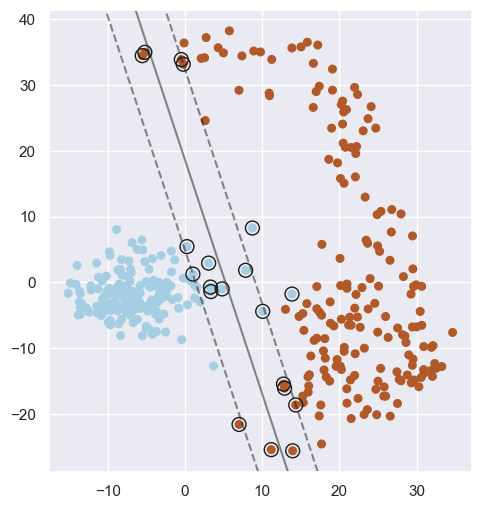

In [9]:
clf_linear = svm.SVC(kernel='linear', C=1)
clf_linear.fit(X, t)

# Plot decision boundary, margin and support vectors for Linear SVM
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_linear.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight support vectors
ax.scatter(clf_linear.support_vectors_[:, 0], clf_linear.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')


## 2.2) Fit a non-linear SVM classifier using the RBF kernel, and plot the decision boundary, margin, and support vectors

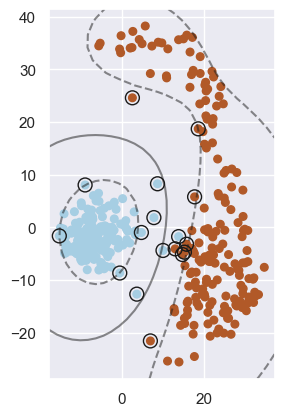

In [10]:
clf_rbf = svm.SVC(kernel='rbf', C=1, gamma='scale')
clf_rbf.fit(X, t)

# Plot decision boundary, margin and support vectors for RBF Kernel SVM
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=t, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight support vectors
ax.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.show()

## 2.3) Compare C=1 with C=1000 on the RBF-kernel SVM-classifier. What is the effect of a larger C? What could be the downside of a very large C?

In [11]:
clf_rbf_C1000 = svm.SVC(kernel='rbf', C=1000, gamma='scale')
clf_rbf_C1000.fit(X, t)

# Print number of support vectors for C=1 and C=1000
print('Number of support vectors for C=1:', len(clf_rbf.support_vectors_))
print('Number of support vectors for C=1000:', len(clf_rbf_C1000.support_vectors_))

Number of support vectors for C=1: 17
Number of support vectors for C=1000: 4
